# Importing And Loading the Dataset for KNN Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


# Data Preparation 

In [2]:
data = train_data + test_data
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [3]:
train_data.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [4]:
train_data["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Lots of missing values found in Cabin and Age Column.

# Data Analysis and Visualisation

We shall perform a bar chart to check the age distribution

# 

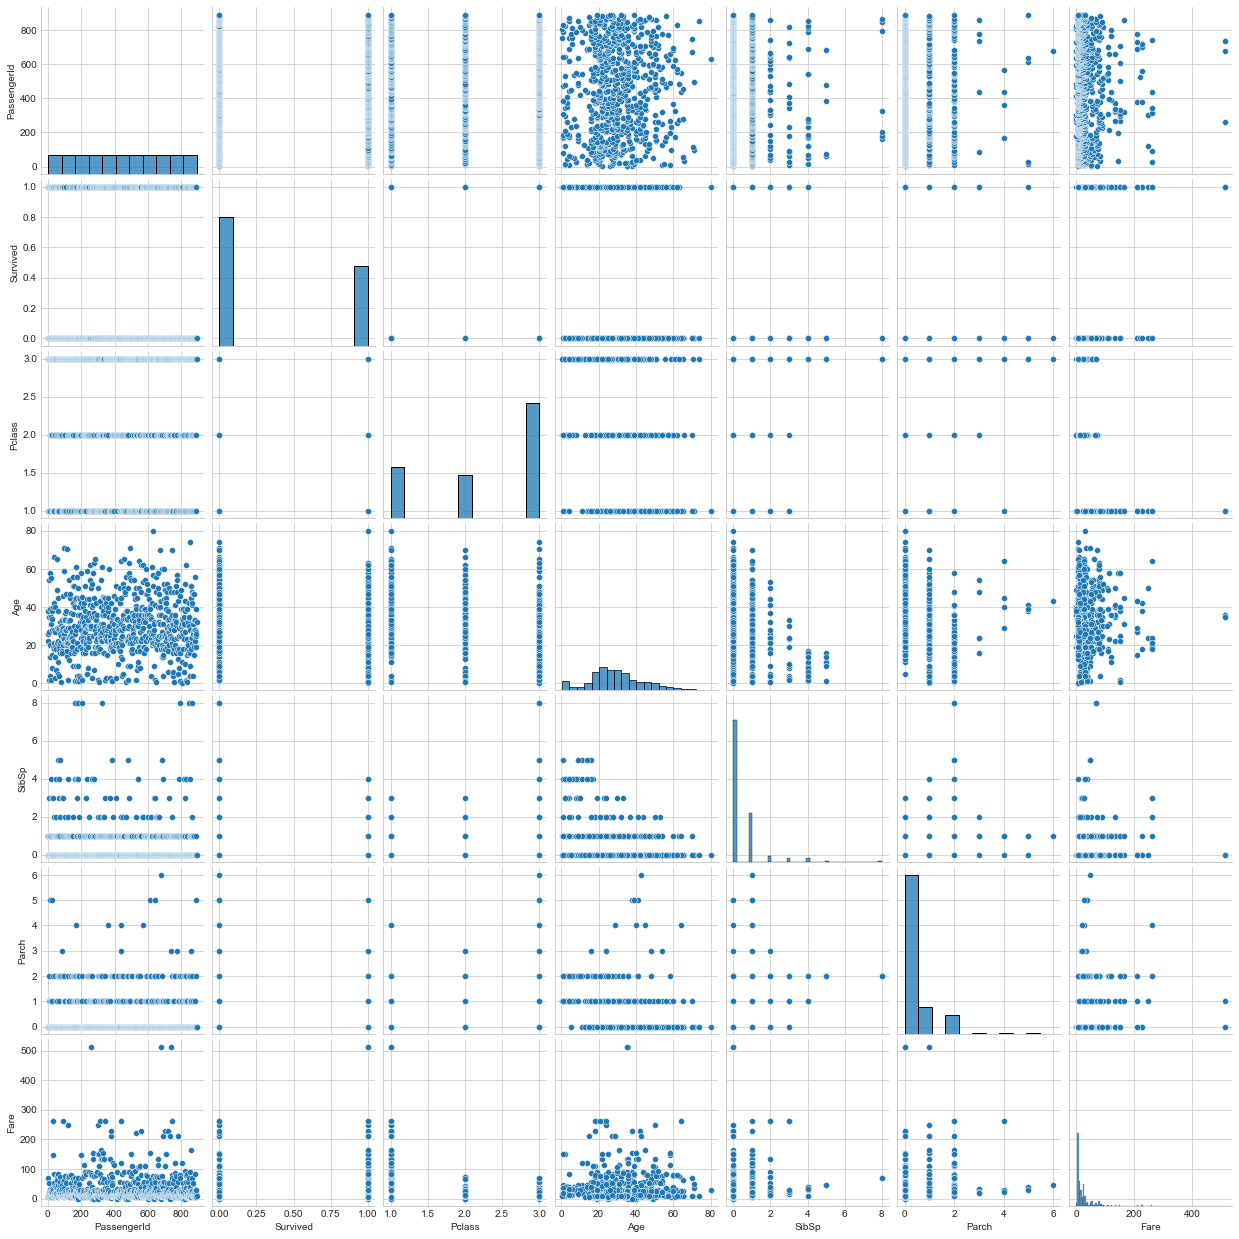

In [9]:
style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,15)
sns.pairplot(train_data)

# Age Distribution Analysis

<AxesSubplot:>

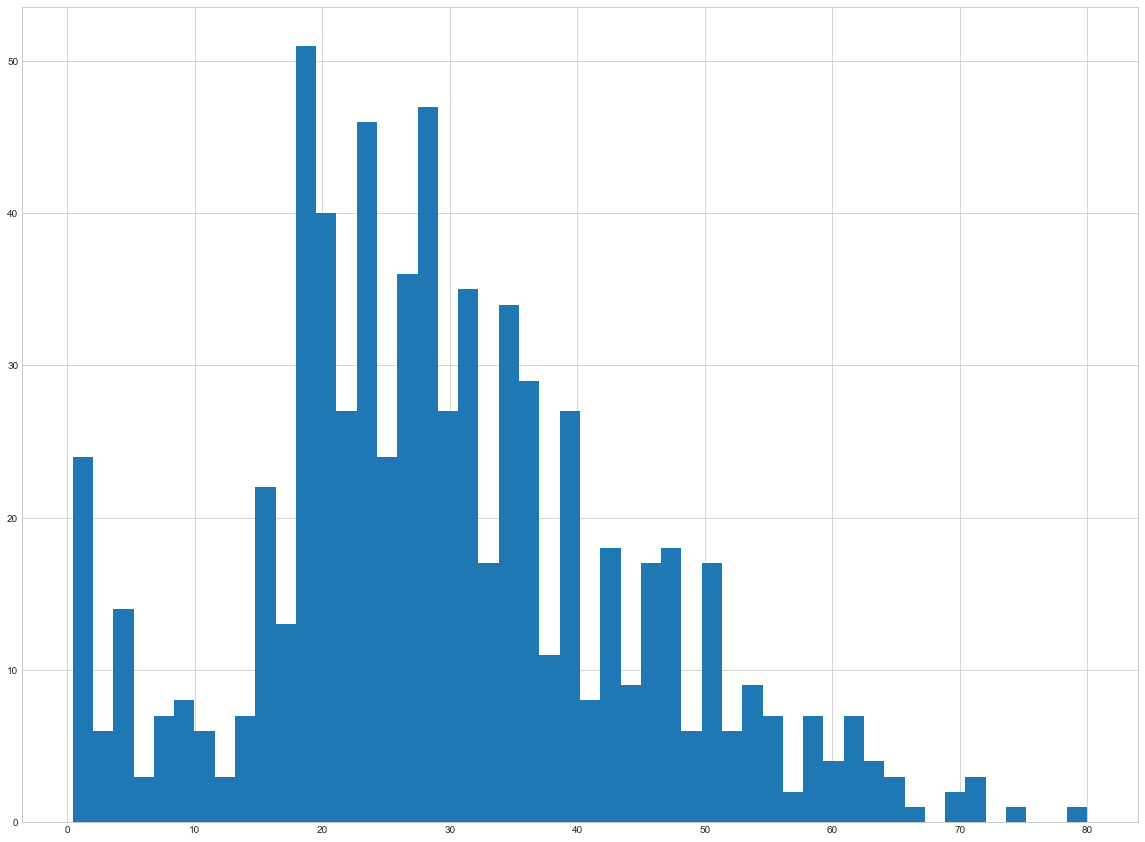

In [10]:
train_data.Age.hist(bins=50, figsize=(20, 15))

Majority of the passengers of both sexes were between the age of 20 - 55. More information can be found on the age bracket that survived the most

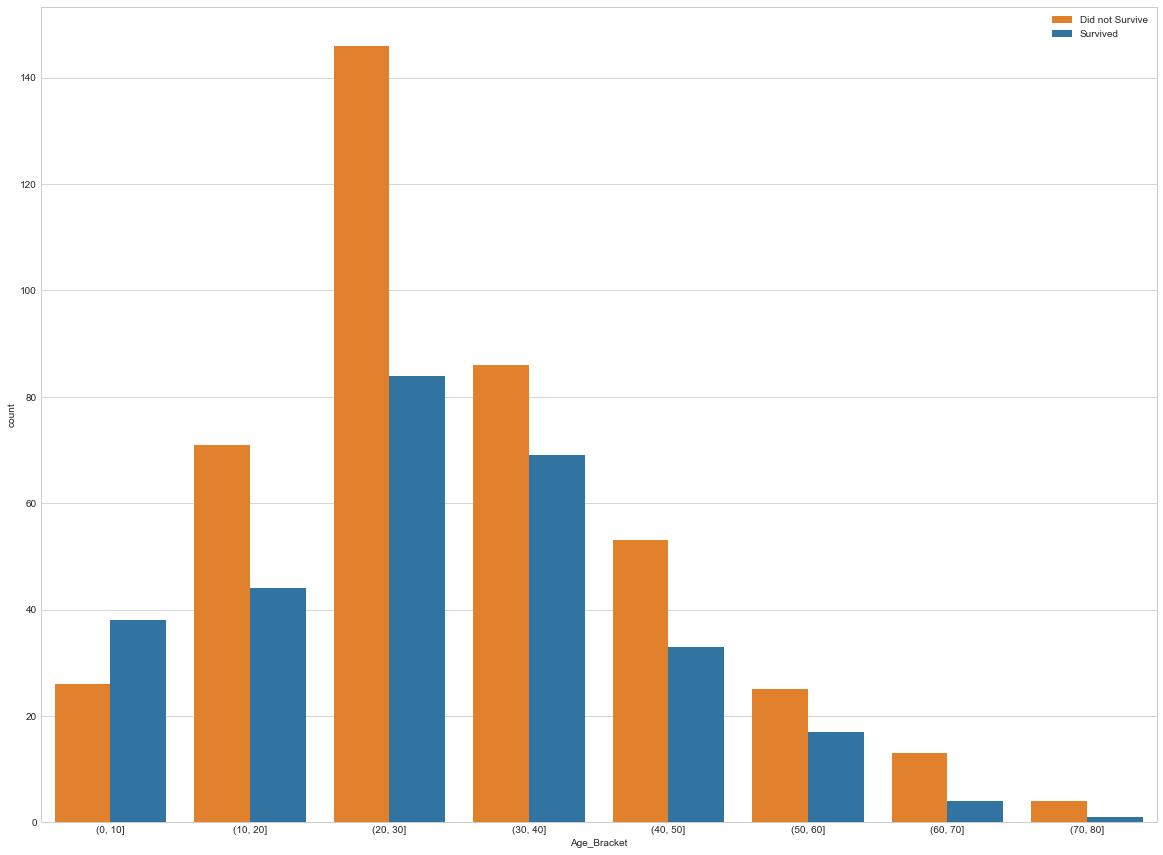

In [11]:
train_data['Age_Bracket'] = pd.cut(train_data.Age, [0, 10, 20, 30, 40, 50, 60, 70, 80])
sns.countplot(x = 'Age_Bracket', hue = 'Survived', data = train_data, palette=['C1', 'C0']).legend(labels = ['Did not Survive', 'Survived'])

# Sex Distribution of Passengers 

In [12]:
sex_table = pd.pivot_table(train_data, index = 'Survived', columns='Sex', values='Ticket', aggfunc = 'count')
print(sex_table)

Sex       female  male
Survived              
0             81   468
1            233   109


In [13]:
train_data.groupby(['Sex']).mean()
    

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


The data suggests that on average, women are more likely to survive than men. We can visualise the hypothesis through histograms

Text(0.5, 1.0, 'Female')

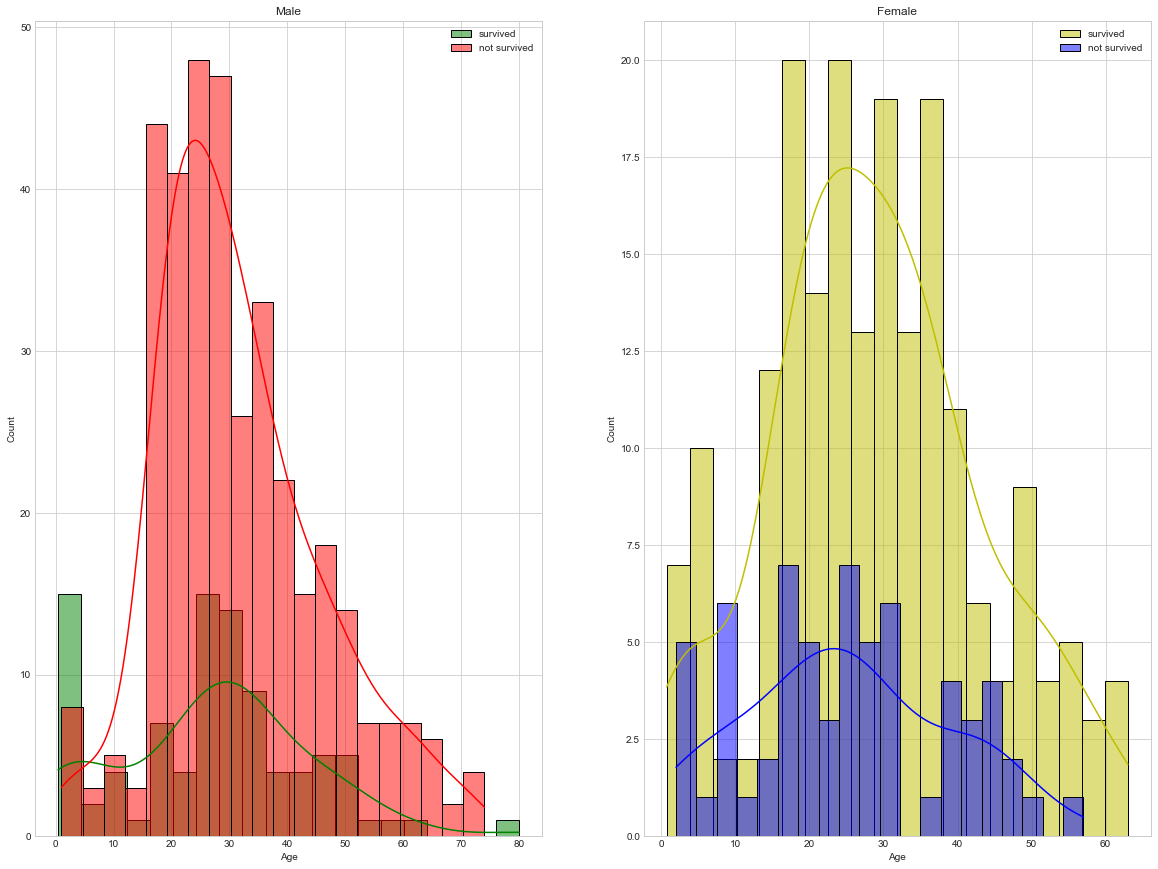

In [14]:
no_of_men = train_data[train_data['Sex']=='male']
no_of_women = train_data[train_data['Sex']=='female']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 15))



ax = sns.histplot(no_of_men[no_of_men['Survived']==1].Age.dropna(), bins=20, label = 'survived', ax = axes[0],color='g', kde=True)
ax = sns.histplot(no_of_men[no_of_men['Survived']==0].Age.dropna(), bins=20, label = 'not survived', ax = axes[0],color='r', kde=True)
ax.legend()
ax.set_title('Male')


ax = sns.histplot(no_of_women[no_of_women['Survived']==1].Age.dropna(), bins=20, label = 'survived', ax = axes[1],color='y', kde=True)
ax = sns.histplot(no_of_women[no_of_women['Survived']==0].Age.dropna(), bins=20, label = 'not survived', ax = axes[1],color='b', kde=True)
ax.legend()
ax.set_title('Female')

This shows that Women were the majority that survived compared to men. Let us visualise the non-survival rate of distribution between the sexes.

# Correlation Matrix and Heatmap

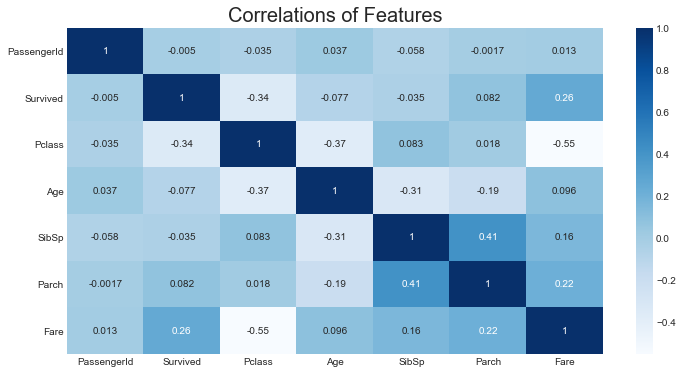

In [15]:
plt.subplots(figsize = (12,6))
sns.heatmap(train_data.corr(), annot=True,cmap="Blues")
plt.title("Correlations of Features", fontsize = 20);

We can infer from the correlation heatmap age negatively impacts with SibSp

Since Parch and SibSp are classifed under family, It makes the most sense to add them together as members so as to predict the survival chances of someone that is alone and with family members.

In [16]:
data = [train_data, test_data]
for dataset in data:
    dataset['Fam_Members'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['Fam_Members'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['Fam_Members'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_data['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

# Data Processing

Remove Unnecessary Data Fields that do not contribute to the prediction of the model.

In [17]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bracket,Fam_Members,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]",1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]",1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]",0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]",1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]",0,1


# Dealing with Missing Data

Data Imputation is the best solution to deal with the missing values foung in Age, Cabin and Embarked Columns. For Cabin, we can assign N/A to complete the column.

In [18]:
train_data.Cabin = train_data.Cabin.fillna('n/a')
test_data.Cabin = test_data.Cabin.fillna('n/a')

We can deal with Age by inputting random numbers in the range of the mean age value.

In [19]:
train_data["Age"].fillna(train_data['Age'].mean(), inplace=True)
train_data.Age = train_data["Age"].astype(int)

test_data["Age"].fillna(test_data['Age'].mean(), inplace=True)
test_data.Age = test_data["Age"].astype(int)
    
    

In [20]:
train_data['Age'].isna().sum()

0

 Embarked has two missing values and the most frequent occuring point of boarding is Southampton. The best solution is to substitute the missing values with the mode of the distribution.

In [21]:
train_data.Embarked.fillna(train_data.Embarked.mode()[0], inplace = True)

In [22]:
train_data["Embarked"].isna().sum()

0

# Data Modelling

We need to consider the important features that we can use for our model so we will drop Name, Ticket and Fare. Sex is a feature needed for this task so we may have to convert Sex into a numerical value.

In [23]:
gender = pd.get_dummies(train_data['Sex'],drop_first=True)
train_data['gender'] = gender
train_data.head()

test_gender = pd.get_dummies(test_data['Sex'],drop_first=True)
test_data['gender'] = test_gender
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fam_Members,not_alone,gender
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,n/a,Q,0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,n/a,S,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,n/a,Q,0,1,1
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,n/a,S,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,n/a,S,2,0,0


In [24]:
train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Bracket,Fam_Members,not_alone,gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,n/a,S,"(20, 30]",1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C85,C,"(30, 40]",1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,n/a,S,"(20, 30]",0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,C123,S,"(30, 40]",1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,n/a,S,"(30, 40]",0,1,1


Name isn't really a feature that can influence any outcomes so it is best we drop this column

In [25]:
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Bracket,Fam_Members,not_alone,gender
0,1,0,3,male,22,1,0,7.2500,n/a,S,"(20, 30]",1,0,1
1,2,1,1,female,38,1,0,71.2833,C85,C,"(30, 40]",1,0,0
2,3,1,3,female,26,0,0,7.9250,n/a,S,"(20, 30]",0,1,0
3,4,1,1,female,35,1,0,53.1000,C123,S,"(30, 40]",1,0,0
4,5,0,3,male,35,0,0,8.0500,n/a,S,"(30, 40]",0,1,1


In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    object  
 4   Age          891 non-null    int32   
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Cabin        891 non-null    object  
 9   Embarked     891 non-null    object  
 10  Age_Bracket  714 non-null    category
 11  Fam_Members  891 non-null    int64   
 12  not_alone    891 non-null    int32   
 13  gender       891 non-null    uint8   
dtypes: category(1), float64(1), int32(2), int64(6), object(3), uint8(1)
memory usage: 78.9+ KB


In [27]:
ports = {"S": 0, "C": 1, "Q": 2}
the_data =[train_data, test_data]

for dataset in the_data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Bracket,Fam_Members,not_alone,gender
0,1,0,3,male,22,1,0,7.2500,n/a,0,"(20, 30]",1,0,1
1,2,1,1,female,38,1,0,71.2833,C85,1,"(30, 40]",1,0,0
2,3,1,3,female,26,0,0,7.9250,n/a,0,"(20, 30]",0,1,0
3,4,1,1,female,35,1,0,53.1000,C123,0,"(30, 40]",1,0,0
4,5,0,3,male,35,0,0,8.0500,n/a,0,"(30, 40]",0,1,1


The Fare Feature needs to be normalised and converted into an inttype to be uniform with the rest of our dataset.

In [28]:
a_data = [train_data, test_data]

for data in a_data:
    data['Fare'] = data['Fare'].fillna(0)
    data['Fare'] = data['Fare'].astype(int)

In [29]:
pd.qcut(train_data['Fare'], q=6)

0      (-0.001, 7.0]
1      (52.0, 512.0]
2      (-0.001, 7.0]
3      (52.0, 512.0]
4         (7.0, 8.0]
           ...      
886      (8.0, 14.0]
887     (26.0, 52.0]
888     (14.0, 26.0]
889     (26.0, 52.0]
890    (-0.001, 7.0]
Name: Fare, Length: 891, dtype: category
Categories (6, interval[float64]): [(-0.001, 7.0] < (7.0, 8.0] < (8.0, 14.0] < (14.0, 26.0] < (26.0, 52.0] < (52.0, 512.0]]

In [30]:
train_data['Fare_Class'] = pd.cut(train_data['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid','High_Mid','High'])
train_data.head()
    

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Bracket,Fam_Members,not_alone,gender,Fare_Class
0,1,0,3,male,22,1,0,7,n/a,0,"(20, 30]",1,0,1,Low
1,2,1,1,female,38,1,0,71,C85,1,"(30, 40]",1,0,0,High
2,3,1,3,female,26,0,0,7,n/a,0,"(20, 30]",0,1,0,Low
3,4,1,1,female,35,1,0,53,C123,0,"(30, 40]",1,0,0,High
4,5,0,3,male,35,0,0,8,n/a,0,"(30, 40]",0,1,1,Mid


In [31]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fam_Members,not_alone,gender
0,892,3,male,34,0,0,7,n/a,2,0,1,1
1,893,3,female,47,1,0,7,n/a,0,1,0,0
2,894,2,male,62,0,0,9,n/a,2,0,1,1
3,895,3,male,27,0,0,8,n/a,0,0,1,1
4,896,3,female,22,1,1,12,n/a,0,2,0,0


# Drop all non-numerical features 

In [32]:
train_data = train_data.drop(['Sex'], axis=1)
test_data = test_data.drop(['Sex'], axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Bracket,Fam_Members,not_alone,gender,Fare_Class
0,1,0,3,22,1,0,7,n/a,0,"(20, 30]",1,0,1,Low
1,2,1,1,38,1,0,71,C85,1,"(30, 40]",1,0,0,High
2,3,1,3,26,0,0,7,n/a,0,"(20, 30]",0,1,0,Low
3,4,1,1,35,1,0,53,C123,0,"(30, 40]",1,0,0,High
4,5,0,3,35,0,0,8,n/a,0,"(30, 40]",0,1,1,Mid


In [33]:
train_data = train_data.drop(["Age_Bracket"], axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Fam_Members,not_alone,gender,Fare_Class
0,1,0,3,22,1,0,7,n/a,0,1,0,1,Low
1,2,1,1,38,1,0,71,C85,1,1,0,0,High
2,3,1,3,26,0,0,7,n/a,0,0,1,0,Low
3,4,1,1,35,1,0,53,C123,0,1,0,0,High
4,5,0,3,35,0,0,8,n/a,0,0,1,1,Mid


In [34]:
train_data = train_data.drop(['Fare_Class'], axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Fam_Members,not_alone,gender
0,1,0,3,22,1,0,7,n/a,0,1,0,1
1,2,1,1,38,1,0,71,C85,1,1,0,0
2,3,1,3,26,0,0,7,n/a,0,0,1,0
3,4,1,1,35,1,0,53,C123,0,1,0,0
4,5,0,3,35,0,0,8,n/a,0,0,1,1


In [35]:
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Fam_Members,not_alone,gender
0,1,0,3,22,1,0,7,0,1,0,1
1,2,1,1,38,1,0,71,1,1,0,0
2,3,1,3,26,0,0,7,0,0,1,0
3,4,1,1,35,1,0,53,0,1,0,0
4,5,0,3,35,0,0,8,0,0,1,1


In [36]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Fam_Members,not_alone,gender
0,892,3,34,0,0,7,2,0,1,1
1,893,3,47,1,0,7,0,1,0,0
2,894,2,62,0,0,9,2,0,1,1
3,895,3,27,0,0,8,0,0,1,1
4,896,3,22,1,1,12,0,2,0,0


# Model Training and Results

In [37]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test = test_data

Logistic Regression 

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

print(round(acc_log,2), "%")

79.8 %


C:\Users\Student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN Classification Algorithm

In [39]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

print(round(acc_knn,2), "%")

79.69 %


Random Forest Method

In [40]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

print(round(acc_random_forest, 2), "%")

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': Y_prediction})
output.to_csv('submission.csv', index=False)
print("Your Submission was saved!")

84.96 %
Your Submission was saved!


Look like our ensemble methods are suffering from overfitting. This is probably due to learning the noise and the non-important features in the training set. With further improvement, this should have an accuracy of at least 82%